# Next Word Prediction with NLP and Deep Learning

- The model will consider the last word of a particular sentence and predict the next possible word. 
- We will be using methods of natural language processing, language modeling, and deep learning. 
- We will start by analyzing the data followed by the pre-processing of the data. 
- We will then tokenize this data and finally build the deep learning model. The deep learning model will be built using LSTM’s.


# Inserting required libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

<h3>1.PRE - PROCESSING THE DATASET</h3>

- Next step of our cleaning process involves replacing all the unnecessary extra new lines, the carriage return, and the Unicode character. 
- Finally, we will make sure we have only unique words. 
- We will consider each word only once and remove any additional repetitions. 
- This will help the model train better avoiding extra confusion due to the repetition of words.

In [3]:
file = open("metamorphosis_clean.txt", "r", encoding = "utf8")
lines = []

for i in file:
    lines.append(i)
    
print("The First Line: ", lines[0])
print("The Last Line: ", lines[-1])

The First Line:  One morning, when Gregor Samsa woke from troubled dreams, he found

The Last Line:  first to get up and stretch out her young body.


### Cleaning the data:

In [4]:
data = ""

for i in lines:
    data = ' '. join(lines)
    
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')

#printing the data
data[:500]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin.  He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections.  The bedding was hardly able to cover it and seemed ready to slide off any moment.  His many legs, pitifully thin compared with the size of the rest of him, waved about helplessly as he looked.  "What\'s happened to me?" he'

In [5]:
import string

#removes all the punct
translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

new_data[:500]

'One morning  when Gregor Samsa woke from troubled dreams  he found himself transformed in his bed into a horrible vermin   He lay on his armour like back  and if he lifted his head a little he could see his brown belly  slightly domed and divided by arches into stiff sections   The bedding was hardly able to cover it and seemed ready to slide off any moment   His many legs  pitifully thin compared with the size of the rest of him  waved about helplessly as he looked    What s happened to me   he'

In [6]:
#removes all the repedted words in the sentence
z = []

for i in data.split():
    if i not in z:
        z.append(i)
        
data = ' '.join(z)
data[:500]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He lay on armour-like back, and if lifted head little could see brown belly, slightly domed divided by arches stiff sections. The bedding was hardly able to cover it seemed ready slide off any moment. His many legs, pitifully thin compared with the size of rest him, waved about helplessly as looked. "What\'s happened me?" thought. It wasn\'t dream. room, proper human room altho'

### Tokenization:

- Tokenization refers to splitting bigger text data, essays, or corpus’s into smaller segments. 

In [7]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[17, 53, 293, 2, 18, 729, 135, 730, 294, 8]

In [8]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

2617


In [9]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  3889


array([[ 17,  53],
       [ 53, 293],
       [293,   2],
       [  2,  18],
       [ 18, 729],
       [729, 135],
       [135, 730],
       [730, 294],
       [294,   8],
       [  8, 731]])

In [10]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])
    
X = np.array(X)
y = np.array(y)

In [11]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [ 17  53 293   2  18]
The responses are:  [ 53 293   2  18 729]


In [12]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# CREATING THE MODEL:

- We will be building a sequential model. 
- We will then create an embedding layer and specify the input dimensions and output dimensions. 

##### An LSTM layer learns long-term dependencies between time steps in time series and sequence data

In [16]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1, 10)             26170     
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 1000)           4044000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 1000)              8004000   
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_3 (Dense)              (None, 2617)              2619617   
Total params: 15,694,787
Trainable params: 15,694,787
Non-trainable params: 0
_________________________________________________________________


<h4>MODEL PLOT</h4>

In [18]:
!pip install pydot


In [19]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


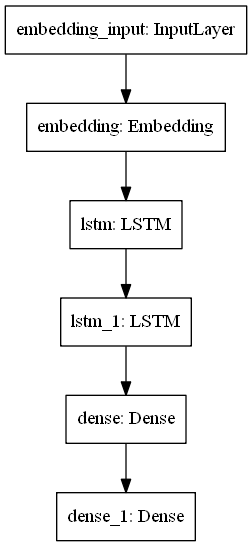

<h4>Callbacks:</h4>

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

<h4>Compile the model: </h4>

In [21]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))

<h4>Fit the model</h4>

In [22]:
history = model.fit(X, y, epochs=150, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/150
61/61 [==============================] - 14s 160ms/step - loss: 7.8754

Epoch 00001: loss improved from inf to 7.87541, saving model to nextword1.h5
Epoch 2/150
61/61 [==============================] - 10s 157ms/step - loss: 7.8628

Epoch 00002: loss improved from 7.87541 to 7.86281, saving model to nextword1.h5
Epoch 3/150
61/61 [==============================] - 9s 152ms/step - loss: 7.8153

Epoch 00003: loss improved from 7.86281 to 7.81531, saving model to nextword1.h5
Epoch 4/150
61/61 [==============================] - 9s 140ms/step - loss: 7.6308

Epoch 00004: loss improved from 7.81531 to 7.63081, saving model to nextword1.h5
Epoch 5/150
61/61 [==============================] - 9s 151ms/step - loss: 7.4274

Epoch 00005: loss improved from 7.63081 to 7.42744, saving model to nextword1.h5
Epoch 6/150
61/61 [==============================] - 10s 160ms/step - loss: 7.2563

Epoch 00006: loss improved from 7.42744 to 7.25630, saving model to nextword1.h5
Epoch 7/150
61/61

Epoch 51/150
61/61 [==============================] - 9s 143ms/step - loss: 2.4324

Epoch 00051: loss improved from 2.47613 to 2.43235, saving model to nextword1.h5
Epoch 52/150
61/61 [==============================] - 8s 131ms/step - loss: 2.3770

Epoch 00052: loss improved from 2.43235 to 2.37698, saving model to nextword1.h5
Epoch 53/150
61/61 [==============================] - 8s 130ms/step - loss: 2.3438

Epoch 00053: loss improved from 2.37698 to 2.34385, saving model to nextword1.h5
Epoch 54/150
61/61 [==============================] - 8s 131ms/step - loss: 2.3111

Epoch 00054: loss improved from 2.34385 to 2.31111, saving model to nextword1.h5
Epoch 55/150
61/61 [==============================] - 8s 130ms/step - loss: 2.2851

Epoch 00055: loss improved from 2.31111 to 2.28506, saving model to nextword1.h5
Epoch 56/150
61/61 [==============================] - 8s 133ms/step - loss: 2.2365

Epoch 00056: loss improved from 2.28506 to 2.23654, saving model to nextword1.h5
Epoch 57/1

Epoch 102/150
61/61 [==============================] - 12s 190ms/step - loss: 0.8427

Epoch 00102: loss improved from 0.88783 to 0.84272, saving model to nextword1.h5
Epoch 103/150
61/61 [==============================] - 11s 184ms/step - loss: 0.8192

Epoch 00103: loss improved from 0.84272 to 0.81919, saving model to nextword1.h5
Epoch 104/150
61/61 [==============================] - 11s 186ms/step - loss: 0.8053

Epoch 00104: loss improved from 0.81919 to 0.80529, saving model to nextword1.h5
Epoch 105/150
61/61 [==============================] - 11s 184ms/step - loss: 0.7926

Epoch 00105: loss improved from 0.80529 to 0.79265, saving model to nextword1.h5
Epoch 106/150
61/61 [==============================] - 13s 206ms/step - loss: 0.7868

Epoch 00106: loss improved from 0.79265 to 0.78677, saving model to nextword1.h5
Epoch 107/150
61/61 [==============================] - 11s 187ms/step - loss: 0.7817

Epoch 00107: loss improved from 0.78677 to 0.78170, saving model to nextword1.h

<ipython-input-44-370ad25e8e6d>:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout(pad=50.0)


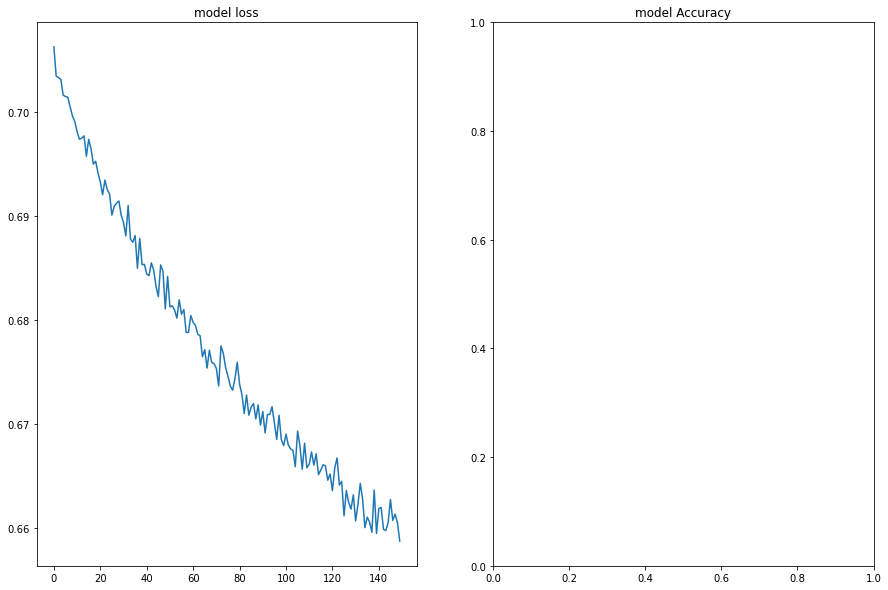

In [44]:
# Plotting the loss and accuracy achieved by the model in each epoch
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,10))
ax[0].plot(history.history['loss'])
#ax[1].plot(history.history['accuracy'])
ax[0].set_title('model loss')
ax[1].set_title('model Accuracy')
fig.tight_layout(pad=50.0)
plt.show()